# Student Performance Prediction 

###

## 1. Introduction

### 1.1 Context:


     This notebook explores student performance data to identfiy the factors that influence academic outcomes. Through exploratory data analysis (EDA), I examine demographic, academic, and lifestlye features such as gender, income, attendance, gaming hours, and prior grades. After uncovering trends and relationships, I build machine learning models to predict the Overall performance score of students. This process provides insights for educators and serves as a foundation for data-driven interventions to support student sucess.

### 1.2 Problem Statement:


    1. What factors significantly influence students' overall academic performance
    2. Is it possible to build machine learning model to predict a student's Overall performance score based on demographic, academic, and lifestyle features?

### 1.3 Why this is important


Understanding the factors that affect student performance is essentail for improving educational outcomes. By analyzing academic, demographic, and lifestyle data, schools and educators can:
- Identify students who may be at risk underperforming.
- Develop targeted interventions to improve learning outcomes.
- Optimize teaching strategies and resource allocation.
- Use predictive models to support data-driven decision-making in education.

## 2. Objectives

### 2.1 Clear goals of the analysis/model

The primary goal of this analysis is to understand and predict student academic performance. Specifically, this notebook aims to:
1. Explore the dataset through descriptive statistics and visualization to identify patterns, distributions, and relationships among features.
2. Determine the key factors (academic, demographic, lifestlye) that influence the Overall performance score.
3. Preprocess the data by handling categorical features, scaling numerical features, and preparing the dataset for modeling
4. Develop machine learning models to predict a student's Overall performance score.
5. Evaluate model performance using appropriate regression metrics (MAE, RMSE, R^2)
6. Provide actionable insights for educators and decision-makers to support students more effectively

## 3. Data Description

### 3.1 Dataset Source

URL: https://data.mendeley.com/datasets/5b82ytz489/1

### 3.2 Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3.2 Load and Explore the Dataset

In [2]:
df = pd.read_csv('ResearchInformation3.csv')

In [3]:
df.head()

,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Last,Overall
0,Business Administration,Male,4.17,4.84,"Low (Below 15,000)",Village,3,More than 3 Hours,0-1 Hour,80%-100%,No,3,Yes,6th,3.220,3.350
1,Business Administration,Female,4.92,5.00,"Upper middle (30,000-50,000)",City,3,0-1 Hour,0-1 Hour,80%-100%,No,3,Yes,7th,3.467,3.467
2,Business Administration,Male,5.00,4.83,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,More than 3 Hours,80%-100%,No,4,Yes,3rd,4.000,3.720
3,Business Administration,Male,4.00,4.50,"High (Above 50,000)",City,5,More than 3 Hours,More than 3 Hours,80%-100%,No,5,Yes,4th,3.800,3.750
4,Business Administration,Female,2.19,3.17,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,2-3 Hours,80%-100%,No,3,Yes,4th,3.940,3.940


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Department   493 non-null    object 
 1   Gender       493 non-null    object 
 2   HSC          493 non-null    float64
 3   SSC          493 non-null    float64
 4   Income       493 non-null    object 
 5   Hometown     493 non-null    object 
 6   Computer     493 non-null    int64  
 7   Preparation  493 non-null    object 
 8   Gaming       493 non-null    object 
 9   Attendance   493 non-null    object 
 10  Job          493 non-null    object 
 11  English      493 non-null    int64  
 12  Extra        493 non-null    object 
 13  Semester     493 non-null    object 
 14  Last         493 non-null    float64
 15  Overall      493 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 61.8+ KB


In [5]:
df.describe()

,HSC,SSC,Computer,English,Last,Overall
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,4.156775,4.767647,3.338742,3.569980,3.163888,3.188383
std,0.546504,0.349538,1.252988,0.870515,0.641475,0.591801
min,2.170000,3.000000,1.000000,1.000000,1.000000,1.000000
25%,3.830000,4.680000,3.000000,3.000000,2.810000,2.880000
50%,4.170000,4.940000,3.000000,4.000000,3.250000,3.270000
75%,4.500000,5.000000,4.000000,4.000000,3.670000,3.680000
max,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000


In [6]:
df.shape

(493, 16)

In [7]:
df.nunique()

Department      10
Gender           2
HSC             74
SSC             67
Income          10
Hometown         2
Computer         5
Preparation      3
Gaming           3
Attendance       4
Job              2
English          5
Extra            2
Semester        11
Last           158
Overall        128
dtype: int64

### 3.4 Insights

- 10 object feature and 5 numeric feature
- Spread of data is consistent
- max value of HSC and SSC feature is not the same with the higher education max (4)

## 4. Exploratory Data Analysis (EDA)

### 4.1 Data Cleaning

Handle Missing and duplicate values

In [8]:
df.isna().sum()

Department     0
Gender         0
HSC            0
SSC            0
Income         0
Hometown       0
Computer       0
Preparation    0
Gaming         0
Attendance     0
Job            0
English        0
Extra          0
Semester       0
Last           0
Overall        0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['Income'] = df['Income'].str.strip().str.lower()

In [ ]:
df['Income'] = df['Income'].replace({
    'below 15k': 'low (below 15,000)',
    '15-30k': 'lower middle (15,000-30,000)',
    '30-50k': 'upper middle (30,000-50,000)',
    'above 50k': 'high (above 50,000)'
})

array(['low (below 15,000)', 'upper middle (30,000-50,000)',
       'lower middle (15,000-30,000)', 'high (above 50,000)'],
      dtype=object)

Note: No duplicate and missing values

### 4.2 Univariate Analysis

#### Numerical Features

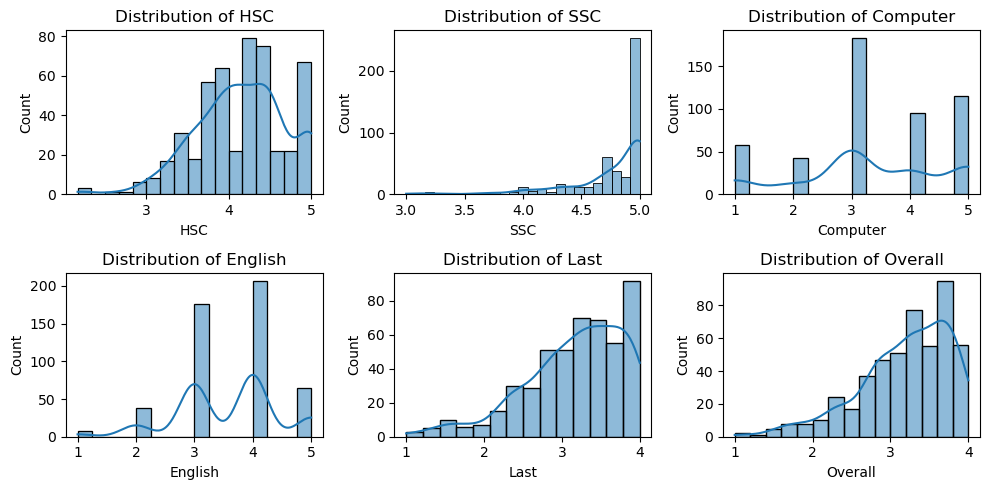

In [12]:
num_cols = df.select_dtypes(include='number').columns.tolist()

fig, axes = plt.subplots(2, 3, figsize=(10,5))
axes = axes.flatten()

for i, feature in enumerate(num_cols):
    sns.histplot(df[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

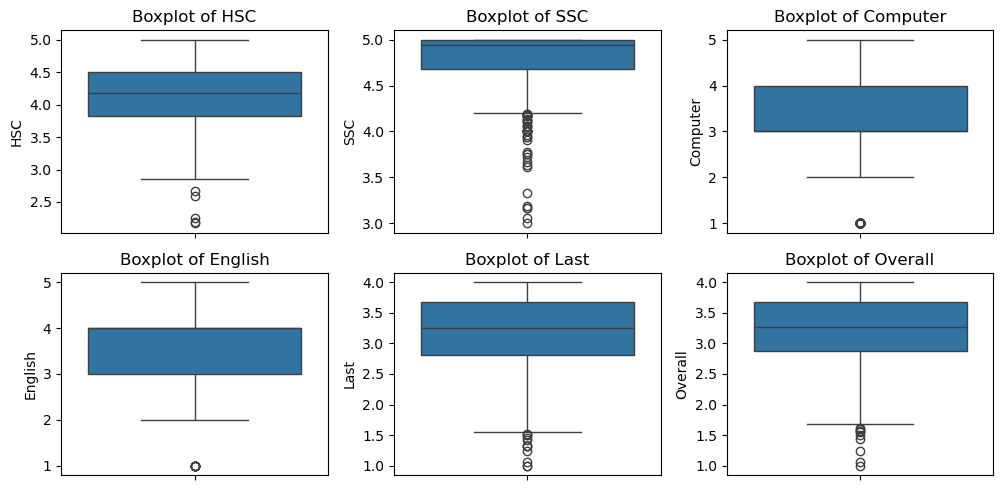

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(10,5))
axes = axes.flatten()

for i, feature in enumerate(num_cols):
    sns.boxplot(df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    plt.tight_layout()
plt.show()

#### Categorical Feature

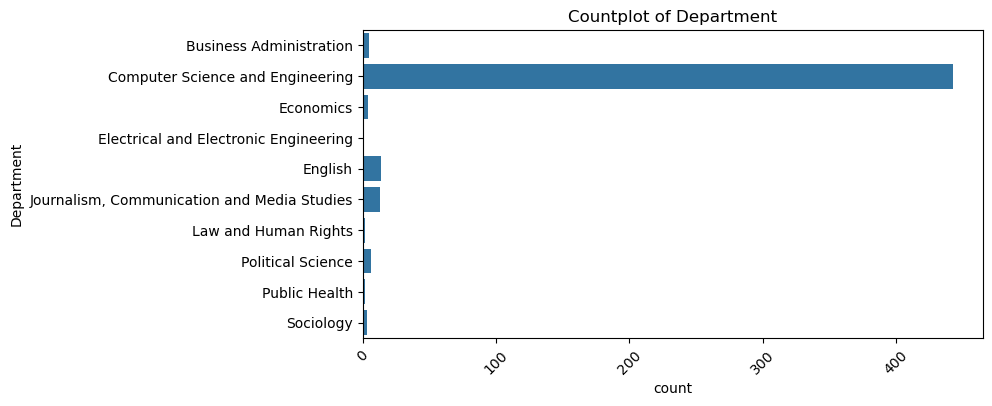

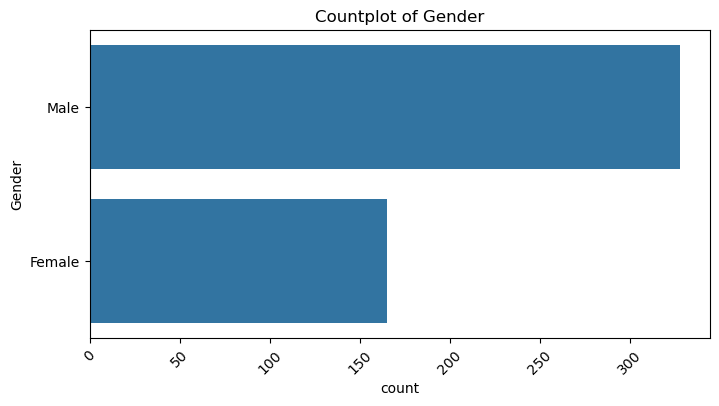

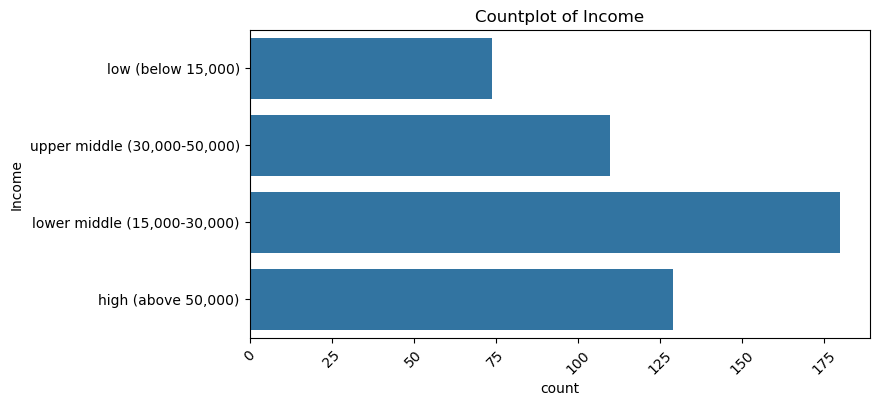

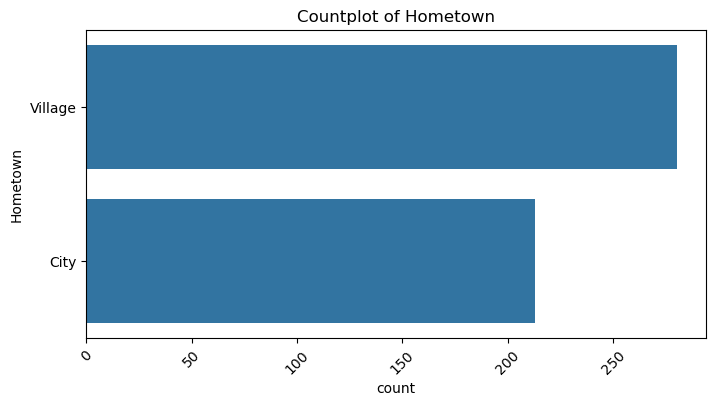

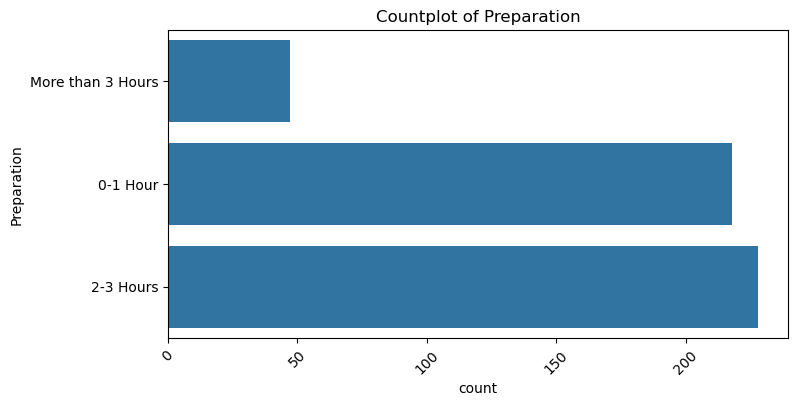

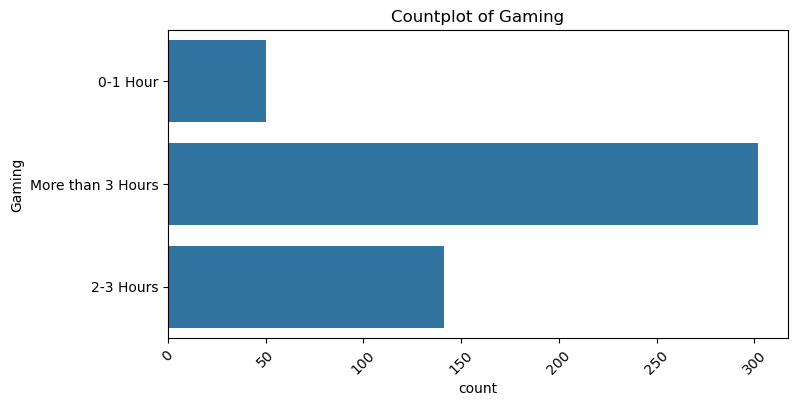

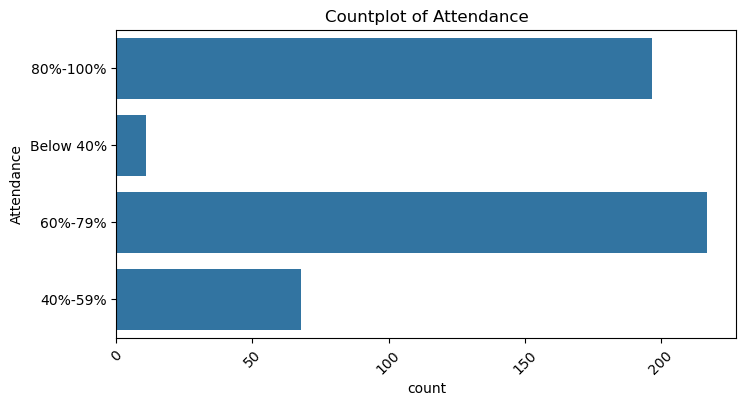

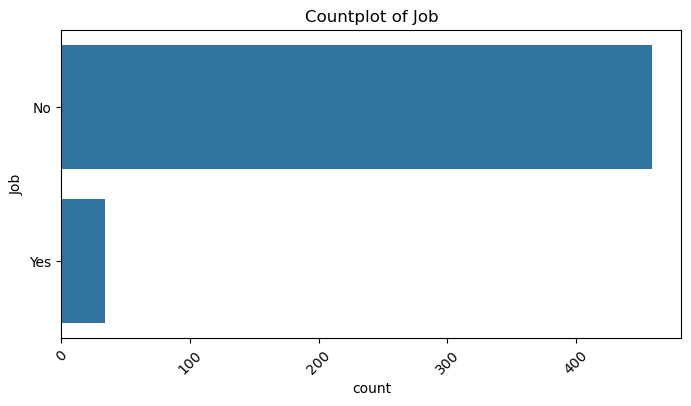

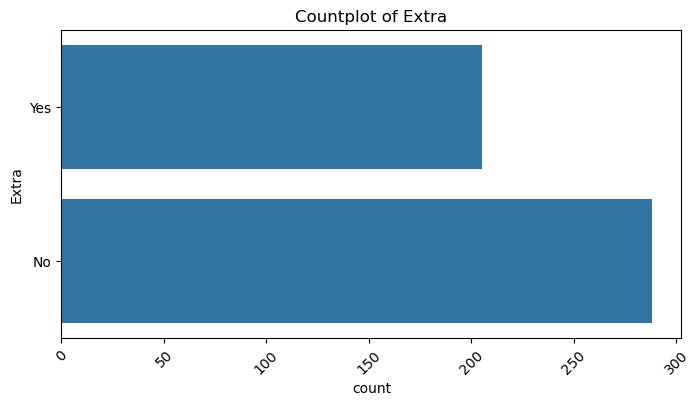

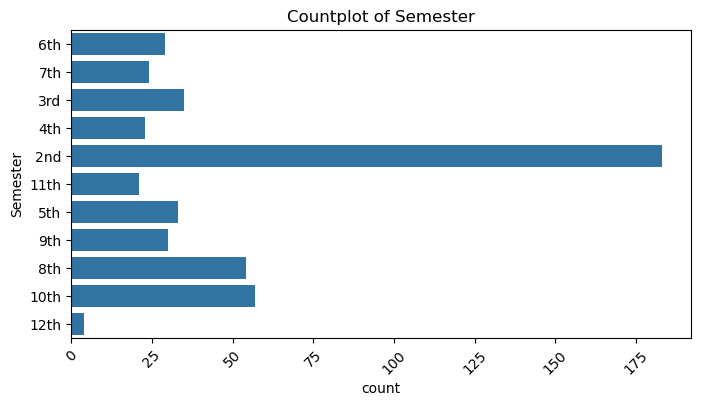

In [14]:
for feature in df.select_dtypes(include='object').columns.tolist():
    plt.figure(figsize=(8,4))
    sns.countplot(df[feature])
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45)
plt.show()

### 4.3 Bivariate/Multivariate Analysis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Department   493 non-null    object 
 1   Gender       493 non-null    object 
 2   HSC          493 non-null    float64
 3   SSC          493 non-null    float64
 4   Income       493 non-null    object 
 5   Hometown     493 non-null    object 
 6   Computer     493 non-null    int64  
 7   Preparation  493 non-null    object 
 8   Gaming       493 non-null    object 
 9   Attendance   493 non-null    object 
 10  Job          493 non-null    object 
 11  English      493 non-null    int64  
 12  Extra        493 non-null    object 
 13  Semester     493 non-null    object 
 14  Last         493 non-null    float64
 15  Overall      493 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 61.8+ KB


<Axes: title={'center': 'Average Proficiency in English by Gender'}, xlabel='Gender'>

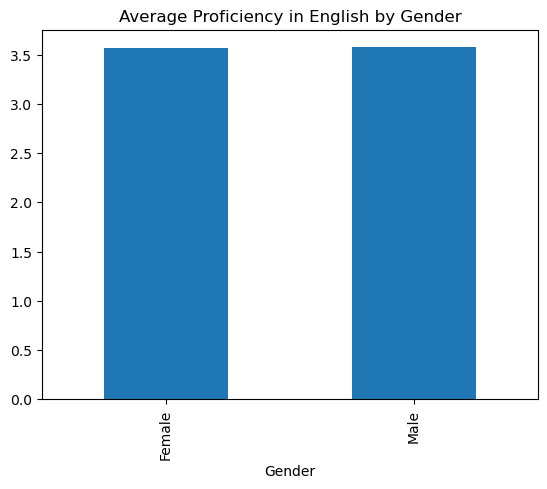

In [16]:
df.groupby('Gender')['English'].mean().plot(kind='bar',title='Average Proficiency in English by Gender')

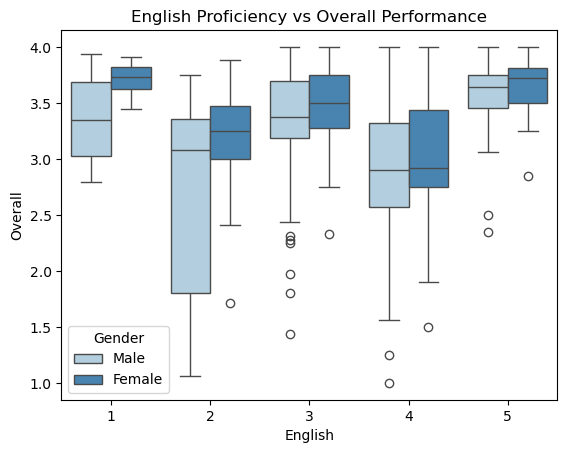

In [17]:
sns.boxplot(x=df['English'], y=df['Overall'],data=df, hue='Gender', palette='Blues')
plt.title('English Proficiency vs Overall Performance')
plt.show()

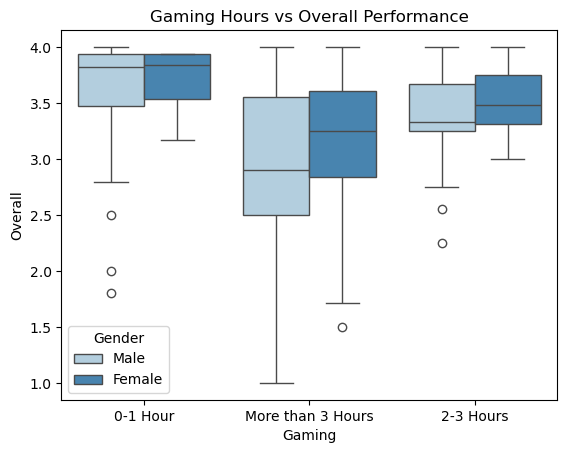

In [18]:
sns.boxplot(data=df, x=df['Gaming'], y=df['Overall'], hue='Gender', palette='Blues')
plt.title('Gaming Hours vs Overall Performance')
plt.show()

<Axes: xlabel='Preparation', ylabel='Overall'>

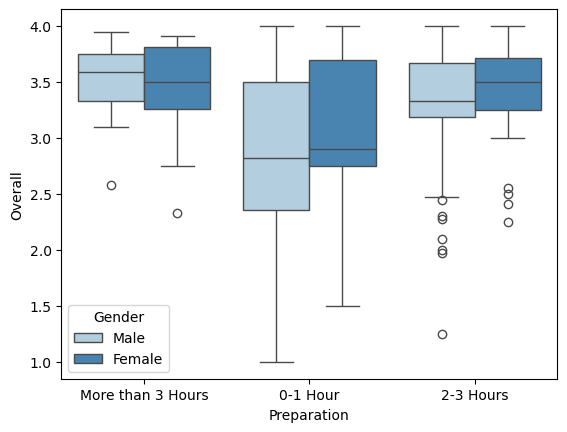

In [19]:
sns.boxplot(data=df, x='Preparation', y='Overall', hue='Gender',palette='Blues')

<Axes: xlabel='Extra', ylabel='Overall'>

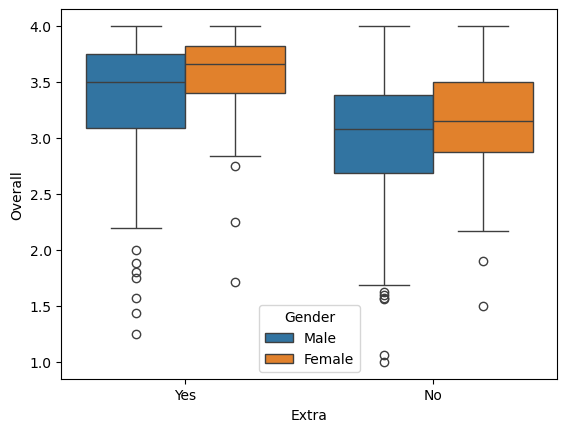

In [20]:
sns.boxplot(data=df, x='Extra', y='Overall', hue='Gender')

Text(0.5, 1.0, 'Impact of Attendance on Overall Grade')

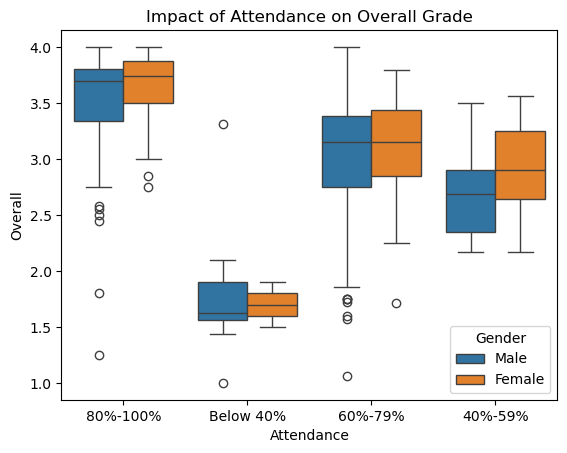

In [21]:
sns.boxplot(data=df, x='Attendance', y='Overall', hue='Gender')
plt.title('Impact of Attendance on Overall Grade')

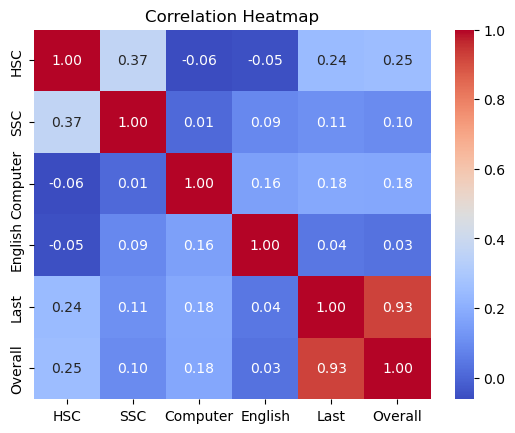

In [22]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### Insights:

Data Cleaning:
    The dataset has no null and duplicated values.

Univariate Analysis:
---
    Numerical Features: 
    - The distribution of numerical data is not normal.
    - SSC feature has a skewed distribution. Consider transforming it before feeding it on a model
    - Outliers is prevalent on each numerical feature
    Categorical Feature:
    - Most of the students in the dataset is a first year, specifically 2nd sem
    - Uneven data distribution of students that has a job
    - Most of the students play more than 3 hours

Multivariate Analysis:
---
    Numerical Feature:
    - English Proficiency vs Overall performance, having a least value of english proficiency has the same overall performance with high english proficiency

    Categorical vs Numerical Feature:
    - Gaming Hours vs Overall Performance, students that plays 0-1 hour tends to have a high overall performance than students that plays more than 3 hours.
    - Preparing more than 3 hours leads to high overall performance
    - Having a extracurricular activities leads to high overall performance
    - Having a near perfect attendannce have leads to high overall performance.

    
Hypothesis:
1. English Proficiency doesn't affect the Overall Performance
2. Students that plays more than 3 hours can lead to poor performance
3. Extracurricular activities leads to high overall performance

Null Hypothesis:
1. English Proficiency have a significant effect on Overall Performance
2. Gaming hours doesn't have significant effect on Overall Performance
3. Extracurricular activities doesn't have significant effect on Overall Performance



## 5. Feature Engineering

### 5.1 Handling Missing and duplicate values

No null and duplicate values

### 5.2 Encoding Categorical Variables

Used One Hot Encoding to features that has 10 or less than unique values (nominal values)

In [23]:
df_encoded = pd.get_dummies(df, columns=['Department', 'Income', 'Attendance', 'Gaming', 'Preparation'],drop_first=True,dtype=int)
df_encoded.head()

,Gender,HSC,SSC,Hometown,Computer,Job,English,Extra,Semester,Last,...,"Income_low (below 15,000)","Income_lower middle (15,000-30,000)","Income_upper middle (30,000-50,000)",Attendance_60%-79%,Attendance_80%-100%,Attendance_Below 40%,Gaming_2-3 Hours,Gaming_More than 3 Hours,Preparation_2-3 Hours,Preparation_More than 3 Hours
0,Male,4.17,4.84,Village,3,No,3,Yes,6th,3.220,...,1,0,0,0,1,0,0,0,0,1
1,Female,4.92,5.00,City,3,No,3,Yes,7th,3.467,...,0,0,1,0,1,0,0,0,0,0
2,Male,5.00,4.83,Village,3,No,4,Yes,3rd,4.000,...,0,1,0,0,1,0,0,1,0,0
3,Male,4.00,4.50,City,5,No,5,Yes,4th,3.800,...,0,0,0,0,1,0,0,1,0,1
4,Female,2.19,3.17,Village,3,No,3,Yes,4th,3.940,...,0,1,0,0,1,0,1,0,0,0


In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 30 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Gender                                                  493 non-null    object 
 1   HSC                                                     493 non-null    float64
 2   SSC                                                     493 non-null    float64
 3   Hometown                                                493 non-null    object 
 4   Computer                                                493 non-null    int64  
 5   Job                                                     493 non-null    object 
 6   English                                                 493 non-null    int64  
 7   Extra                                                   493 non-null    object 
 8   Semester                                

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_features = df_encoded.select_dtypes(include='object').columns.tolist()
cat_features.remove('Semester')

for feature in cat_features:
    df_encoded[feature] = le.fit_transform(df_encoded[feature])
    
semester_mapping = {'2nd': 1, '3rd':2, '4th':3, '5th':4,
                    '6th':5, '7th':6, '8th':7, '9th':8,
                    '10th':9, '11th':10, '12th':11}

df_encoded['Semester'] = df_encoded['Semester'].map(semester_mapping)

In [26]:
df_encoded.head()

,Gender,HSC,SSC,Hometown,Computer,Job,English,Extra,Semester,Last,...,"Income_low (below 15,000)","Income_lower middle (15,000-30,000)","Income_upper middle (30,000-50,000)",Attendance_60%-79%,Attendance_80%-100%,Attendance_Below 40%,Gaming_2-3 Hours,Gaming_More than 3 Hours,Preparation_2-3 Hours,Preparation_More than 3 Hours
0,1,4.17,4.84,1,3,0,3,1,5,3.220,...,1,0,0,0,1,0,0,0,0,1
1,0,4.92,5.00,0,3,0,3,1,6,3.467,...,0,0,1,0,1,0,0,0,0,0
2,1,5.00,4.83,1,3,0,4,1,2,4.000,...,0,1,0,0,1,0,0,1,0,0
3,1,4.00,4.50,0,5,0,5,1,3,3.800,...,0,0,0,0,1,0,0,1,0,1
4,0,2.19,3.17,1,3,0,3,1,3,3.940,...,0,1,0,0,1,0,1,0,0,0


### 5.3 Feature Transformation and Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_encoded['SSC_log'] = np.log1p(df_encoded['SSC'])

scale_features = ['SSC_log', 'HSC', 'Overall']
df_encoded[scale_features] = scaler.fit_transform(df_encoded[scale_features])

In [28]:
df_encoded.head()

,Gender,HSC,SSC,Hometown,Computer,Job,English,Extra,Semester,Last,...,"Income_lower middle (15,000-30,000)","Income_upper middle (30,000-50,000)",Attendance_60%-79%,Attendance_80%-100%,Attendance_Below 40%,Gaming_2-3 Hours,Gaming_More than 3 Hours,Preparation_2-3 Hours,Preparation_More than 3 Hours,SSC_log
0,1,0.706714,4.84,1,3,0,3,1,5,3.220,...,0,0,0,1,0,0,0,0,1,0.933339
1,0,0.971731,5.00,0,3,0,3,1,6,3.467,...,0,1,0,1,0,0,0,0,0,1.000000
2,1,1.000000,4.83,1,3,0,4,1,2,4.000,...,1,0,0,1,0,0,1,0,0,0.929112
3,1,0.646643,4.50,0,5,0,5,1,3,3.800,...,0,0,0,1,0,0,1,0,1,0.785404
4,0,0.007067,3.17,1,3,0,3,1,3,3.940,...,1,0,0,1,0,1,0,0,0,0.102652


In [29]:
df_encoded.drop(columns=['SSC'], inplace =True)

### 5.4 Feature Creation

Instead of using semester, we can convert it into year level

In [30]:
df_encoded['Year Level'] = np.ceil(df_encoded['Semester'] / 2).astype(int)
df_encoded.drop(columns=['Semester'], inplace=True)

In [31]:
df_encoded.head()

,Gender,HSC,Hometown,Computer,Job,English,Extra,Last,Overall,Department_Computer Science and Engineering,...,"Income_upper middle (30,000-50,000)",Attendance_60%-79%,Attendance_80%-100%,Attendance_Below 40%,Gaming_2-3 Hours,Gaming_More than 3 Hours,Preparation_2-3 Hours,Preparation_More than 3 Hours,SSC_log,Year Level
0,1,0.706714,1,3,0,3,1,3.220,0.783333,0,...,0,0,1,0,0,0,0,1,0.933339,3
1,0,0.971731,0,3,0,3,1,3.467,0.822333,0,...,1,0,1,0,0,0,0,0,1.000000,3
2,1,1.000000,1,3,0,4,1,4.000,0.906667,0,...,0,0,1,0,0,1,0,0,0.929112,1
3,1,0.646643,0,5,0,5,1,3.800,0.916667,0,...,0,0,1,0,0,1,0,1,0.785404,2
4,0,0.007067,1,3,0,3,1,3.940,0.980000,0,...,0,0,1,0,1,0,0,0,0.102652,2


### 5.5 Handling Outliers

### 5.6 Feature Selection

## 6. Model Building

### 6.1 Train-Test Split

### 6.2 Baseline Model

### 6.3 Model Training

### 6.4 Model Evaluation

## 7. Results

## 8. Conclusion & Recommendations

## 9. References